<h3> Decision Tree Classifier </h3>  

We start at the <i> tree root </i> and split the data on the feature that results in the largest <b> information Gain, I<sub>G</sub> </b>.  
(See physical notebook on how Ginni is calculated). Information gain is maximimal when the classes are uniformly distributed that is do not all share the same class when classified.    
Thus the ooptimisation objective is to maximise the information gain at each split. There are three primary measures of impurity used in binary decision trees are:  <b> Ginni, entropy, classification error</b>.  

1. Ginni: <b><centre>I<sub>G</sub>(t) = Sum (p(i|t)*(-p(i|t)) = 1-sum(p(i|t))<sup>2</sup></centre></b>
2. Entropy: <b>I<sub>H</sub>(t) = -Sum (p(i|t)*log<sub>2</sub>(p(i|t)) </b>
3. Classification Error : <b>I<sub>E</sub>(t) =  1-max {p(i|t)}<sup>2</sup>  </b>

<mark>p(i|t)</mark> is the proportion of samples tha belong to class for a paticular node t. 

In [1]:
#Visually compare the different impurity criteria (see Raschka Python Machine Learning for formula)
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def gini(p):
    return (p)*(1-(p))+(1-p)*(1-(1-p))


In [3]:
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))


In [4]:
def error(p):
    return 1-np.max([p, 1-p])


In [5]:
%matplotlib inline

x=np.arange(0.1, 1.0, 0.01)
ent = [entropy(p) if e else None for p in x]  #interesting block
sc_ent = [np.e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)

NameError: name 'e' is not defined

In [6]:
for i, lab,ls,c in zip([ent, sc_ent, gini(x), err],['Entropy', 'Entropy (scaled)', 'Gini Impurity',
                                                    'Misclassification Error'], ['-','-','-','-'],['black'
                                                                                                  'lightgray','red','green','cyan']):
    line = ax.plot(x,i, label=lab, linestyle=ls, lw=2, color=c)
    
#didn't know can have multiple conditions in a for loop at leats I learnt that 

NameError: name 'ent' is not defined

In [7]:
ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impuirty Index')
plt.show()

NameError: name 'ax' is not defined

# Implement Decision Tree on iris data

In [8]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [9]:
np.unique(y)
#the species name have been transformed in to numerical labels 

array([0, 1, 2])

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

<b>max_depth</b> controls the expansion of the decision tree. If max_depth is too high then the tree may classify on noise and overfit the data

In [11]:
from sklearn.cross_validation import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.3, random_state=0) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y, classifier, test_idx=None, resolution=0.02):
    #setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue', 'lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])  #each color is a number so each colour corresponds to a unique y label
    
    #plot decision surface
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1  #min and max values for each feature petal width and legnth,  -1 and +1 to extend range
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                np.arange(x2_min, x2_max, resolution))     #meshgrid creates a grid using the feacture vector pairs
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) #.ravel() unrolls a matrix into  1-D array or vector, .T means transpose
    Z = Z.reshape(xx1.shape)  #Z stores the predictions and now has dimensions of xx1
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)  #contourf fills region for each label y, classier stores predictions in Z 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot all samples
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):  #loops over, and returns each element and its counter value
        plt.scatter(x=X[y== cl, 0], y=X[y==cl,1], #positive and negative labels
                    alpha = 0.8, c=cmap(idx), marker=markers[idx], label=cl)
    
    #highlight test samples
    
    if test_idx:  #the index where the testsets starts from 
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', alpha=1.0, linewidth=1, marker='o',
                   s=55, label='test set')

In [14]:
X_combined_std = np.concatenate((X_train_std, X_test_std), axis=0)  #same as np.vstack but this is old version
y_combined = np.hstack((y_train, y_test))


In [15]:
tree.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

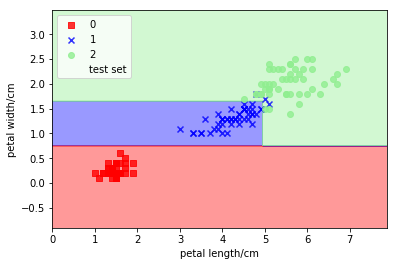

In [16]:
X_combined= np.concatenate((X_train, X_test), axis=0)  #same as np.vstack but this is old version
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length/cm')
plt.ylabel('petal width/cm')
plt.legend(loc='upper left')
plt.show()

can use scikit-learn to export the decision tree as .dot file after training with whtich can visualise using <b> GraphViz</b> program, which is freely available.

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=['petal length','petal width'])

<h3> Random Forests</h3>

The motivation of random forests is to combine <i>weak learners</i> into a more robust better performing <i>strong leaner</i> which has a better generalisation error and less susceptible to overfitting.  
<b> Workflow</b>
1. draw a random bootstrap sample of size n (randomly choose n samples form the taining set with replacement.
2. Grow a decision tree from the bootstrap sample. At each node:
    a. randomly select d features without replacement
    b. Split the node using the best feature that gives the max information gain according to the objective funtion
3. repeat steps 1 to 2 <i> k</i> times
4. Aggregate the prediction from each trees to assign a final class label by majority vote   

for the number of features <i> d </i> at each split we want <i> d= sqrt(m)</i>. 
we want a bootstrap sample size= total training examples for good bias-variance trade-off.   

1. n_estimators : Number of trees in forest. Default is 10.
2. criterion: “gini” or “entropy” same as decision tree classifier.
3. min_samples_split: minimum number of working set size at node required to split. Default is 2.

In [18]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)

In [19]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

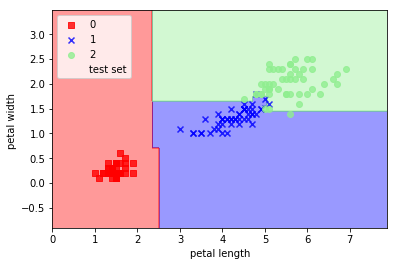

In [20]:
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width ')
plt.legend(loc='upper left')
plt.show()
